<a href="https://colab.research.google.com/github/IndraniMandal/CSC310-S20/blob/master/07_machine_learning_basics_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
###### Config #####
import sys, os, platform
if os.path.isdir("ds-assets"):
  !cd ds-assets && git pull
else:
  !git clone https://github.com/IndraniMandal/ds-assets.git
colab = True if 'google.colab' in os.sys.modules else False
system = platform.system() # "Windows", "Linux", "Darwin"
home = "ds-assets/assets/"
sys.path.append(home)

Already up to date.


In [2]:
# for this notebook we need the ID3 tree machine learning package
!pip3 install decision-tree-id-fork # installs ID3

In [3]:
# notebook level imports
import pandas as pd
import id3                  # Id3Estimator, export_text
from sklearn import tree    # DecisionTreeClassifier, export_text
from sklearn import metrics # accuracy_score

# Machine learning with Decision Trees



# ID3 Decision Trees

We introduced the ID3 decision tree algorithm in the previous slides.  The advantage of ID3 is that is a very simple and straightforward algorithm.  The disadvantage is that it can **only deal with categorical attributes**.

Let's apply ID3 to our tennis dataset and evaluate the results.

In [4]:
tennis_df = pd.read_csv(home+"tennis.csv")
tennis_df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


We have to split our dataset into a **feature matrix** and a **target vector**.

In [5]:
X = tennis_df.drop(columns=['play']) # feature matrix
y = tennis_df[['play']]              # target vector

Next we have to instantiate our decision tree object and train it on the data or statistical jargon "fit it to the data".

In [6]:
# instantiate ID3 object
tennis_tree = id3.Id3Estimator()

# train - ID3 require the target to be a series
tennis_tree.fit(X, y['play'])

Id3Estimator()

Let's see what the decision tree looks like.

In [7]:
print(id3.export_text(tennis_tree.tree_,
                      feature_names=list(X.columns)))


outlook overcast: yes (4) 
outlook rainy
|   windy <=0.50: yes (3) 
|   windy >0.50: no (2) 
outlook sunny
|   humidity high: no (3) 
|   humidity normal: yes (2) 



The above tree is just a different representation of the original tree we looked at.

![pipeline.png](https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/tennis-tree.png)

In order to test the model we can apply the model to the feature matrix and have it predict the label for each row.  We can then compare the predicted labels to the original labels to see if our model made any mistakes and we say that

> A correct model is a model where the predicted labels equal the original training labels

In [8]:
predict_df = pd.DataFrame(tennis_tree.predict(X),
                          columns=['predicted'])
predict_df

,predicted
0,no
1,no
2,yes
3,yes
4,yes
5,no
6,yes
7,no
8,yes
9,yes


Let's compare the original labels in 'y' with the predicted labels in 'predict_df'.

In order to do this we put both vectors into a single dataframe using the Pandas **concat** function.

In [9]:
COLUMNS = 1
compare_df = pd.concat([y,predict_df],axis=COLUMNS)
compare_df

,play,predicted
0,no,no
1,no,no
2,yes,yes
3,yes,yes
4,yes,yes
5,no,no
6,yes,yes
7,no,no
8,yes,yes
9,yes,yes


**Observation**: There is a 1-to-1 correspondence between the original labels and the predicted labels.  That means **our model makes no mistakes**.

# Model Accuracy

We can do a little bit better than manually comparing original vs. predicted labels using **model accuracy**.

Model accurary is defined as:

> $ {accuracy} = \big(1 - \frac{({\# errors})}{({\# observations})}\big) \times 100\%$

Sklean has a function for that, the **accuracy_score**. Note, however, this function returns the score as a small fractional number.  We need to multiply that number by 100% in order to obtain a percentage based accuracy.

In [10]:
# y is the original target vector and predict_df
# is our computed target
print("The accuracy of our model is: {}%"
      .format(metrics.accuracy_score(y, predict_df)*100))

The accuracy of our model is: 100.0%


# The SciKit-Learn Machine Learning Package

The [SciKit-Learn package](https://scikit-learn.org/stable/) (sklearn for short) is one of the most popular and mature Python machine learning packages.  We will use it almost exclusively for our work here.  We will start out with decision  trees knows as **C**lassificand **A**nd **R**egression **T**rees (CART).

# Sklearn CART Trees

The problem with ID3 is that it can only handle categorical data.  The sklearn [CART](https://scikit-learn.org/stable/api/sklearn.tree.html) model can handle numerical data. More specifically, the independent variables of CART need to be numerical and the target can be categorical (classification) or numerical (regression).  We look at converting categorical independent attributes to numerical attributes later.

Let's try the sklearn tree model using the iris dataset (for the necessary imports see the beginning of the notebook)

In [11]:
iris_df = pd.read_csv(home+"iris.csv")
iris_df.head()

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


Set up the data according to sklearn specs: **feature matrix** and **target vector**:

In [12]:
features_df = iris_df.drop(columns=['id','Species'])
features_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Note**: all numerical features as required by sklearn.

In [13]:
target_df = iris_df[['Species']]
target_df.head()

,Species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


**Note**: the target is a categorical attribute, this makes this a classification problem.

We are ready to build our decision tree.  Instantiate the decision tree object.

In [14]:
iris_tree = tree.DecisionTreeClassifier(criterion='entropy')

Train the model.

In [15]:
iris_tree.fit(features_df,target_df)

DecisionTreeClassifier(criterion='entropy')

Show the actual model.  Decision trees are transparent models so we can just look at them:

In [16]:
print(tree.export_text(iris_tree,
                       feature_names=list(features_df.columns)))

|--- Petal.Length <= 2.45
|   |--- class: setosa
|--- Petal.Length >  2.45
|   |--- Petal.Width <= 1.75
|   |   |--- Petal.Length <= 4.95
|   |   |   |--- Petal.Width <= 1.65
|   |   |   |   |--- class: versicolor
|   |   |   |--- Petal.Width >  1.65
|   |   |   |   |--- class: virginica
|   |   |--- Petal.Length >  4.95
|   |   |   |--- Petal.Width <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- Petal.Width >  1.55
|   |   |   |   |--- Sepal.Length <= 6.95
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- Sepal.Length >  6.95
|   |   |   |   |   |--- class: virginica
|   |--- Petal.Width >  1.75
|   |   |--- Petal.Length <= 4.85
|   |   |   |--- Sepal.Length <= 5.95
|   |   |   |   |--- class: versicolor
|   |   |   |--- Sepal.Length >  5.95
|   |   |   |   |--- class: virginica
|   |   |--- Petal.Length >  4.85
|   |   |   |--- class: virginica



We use the `predict` function  to compute a new label for each row in the `features_df` dataframe.

[Ellipsis]

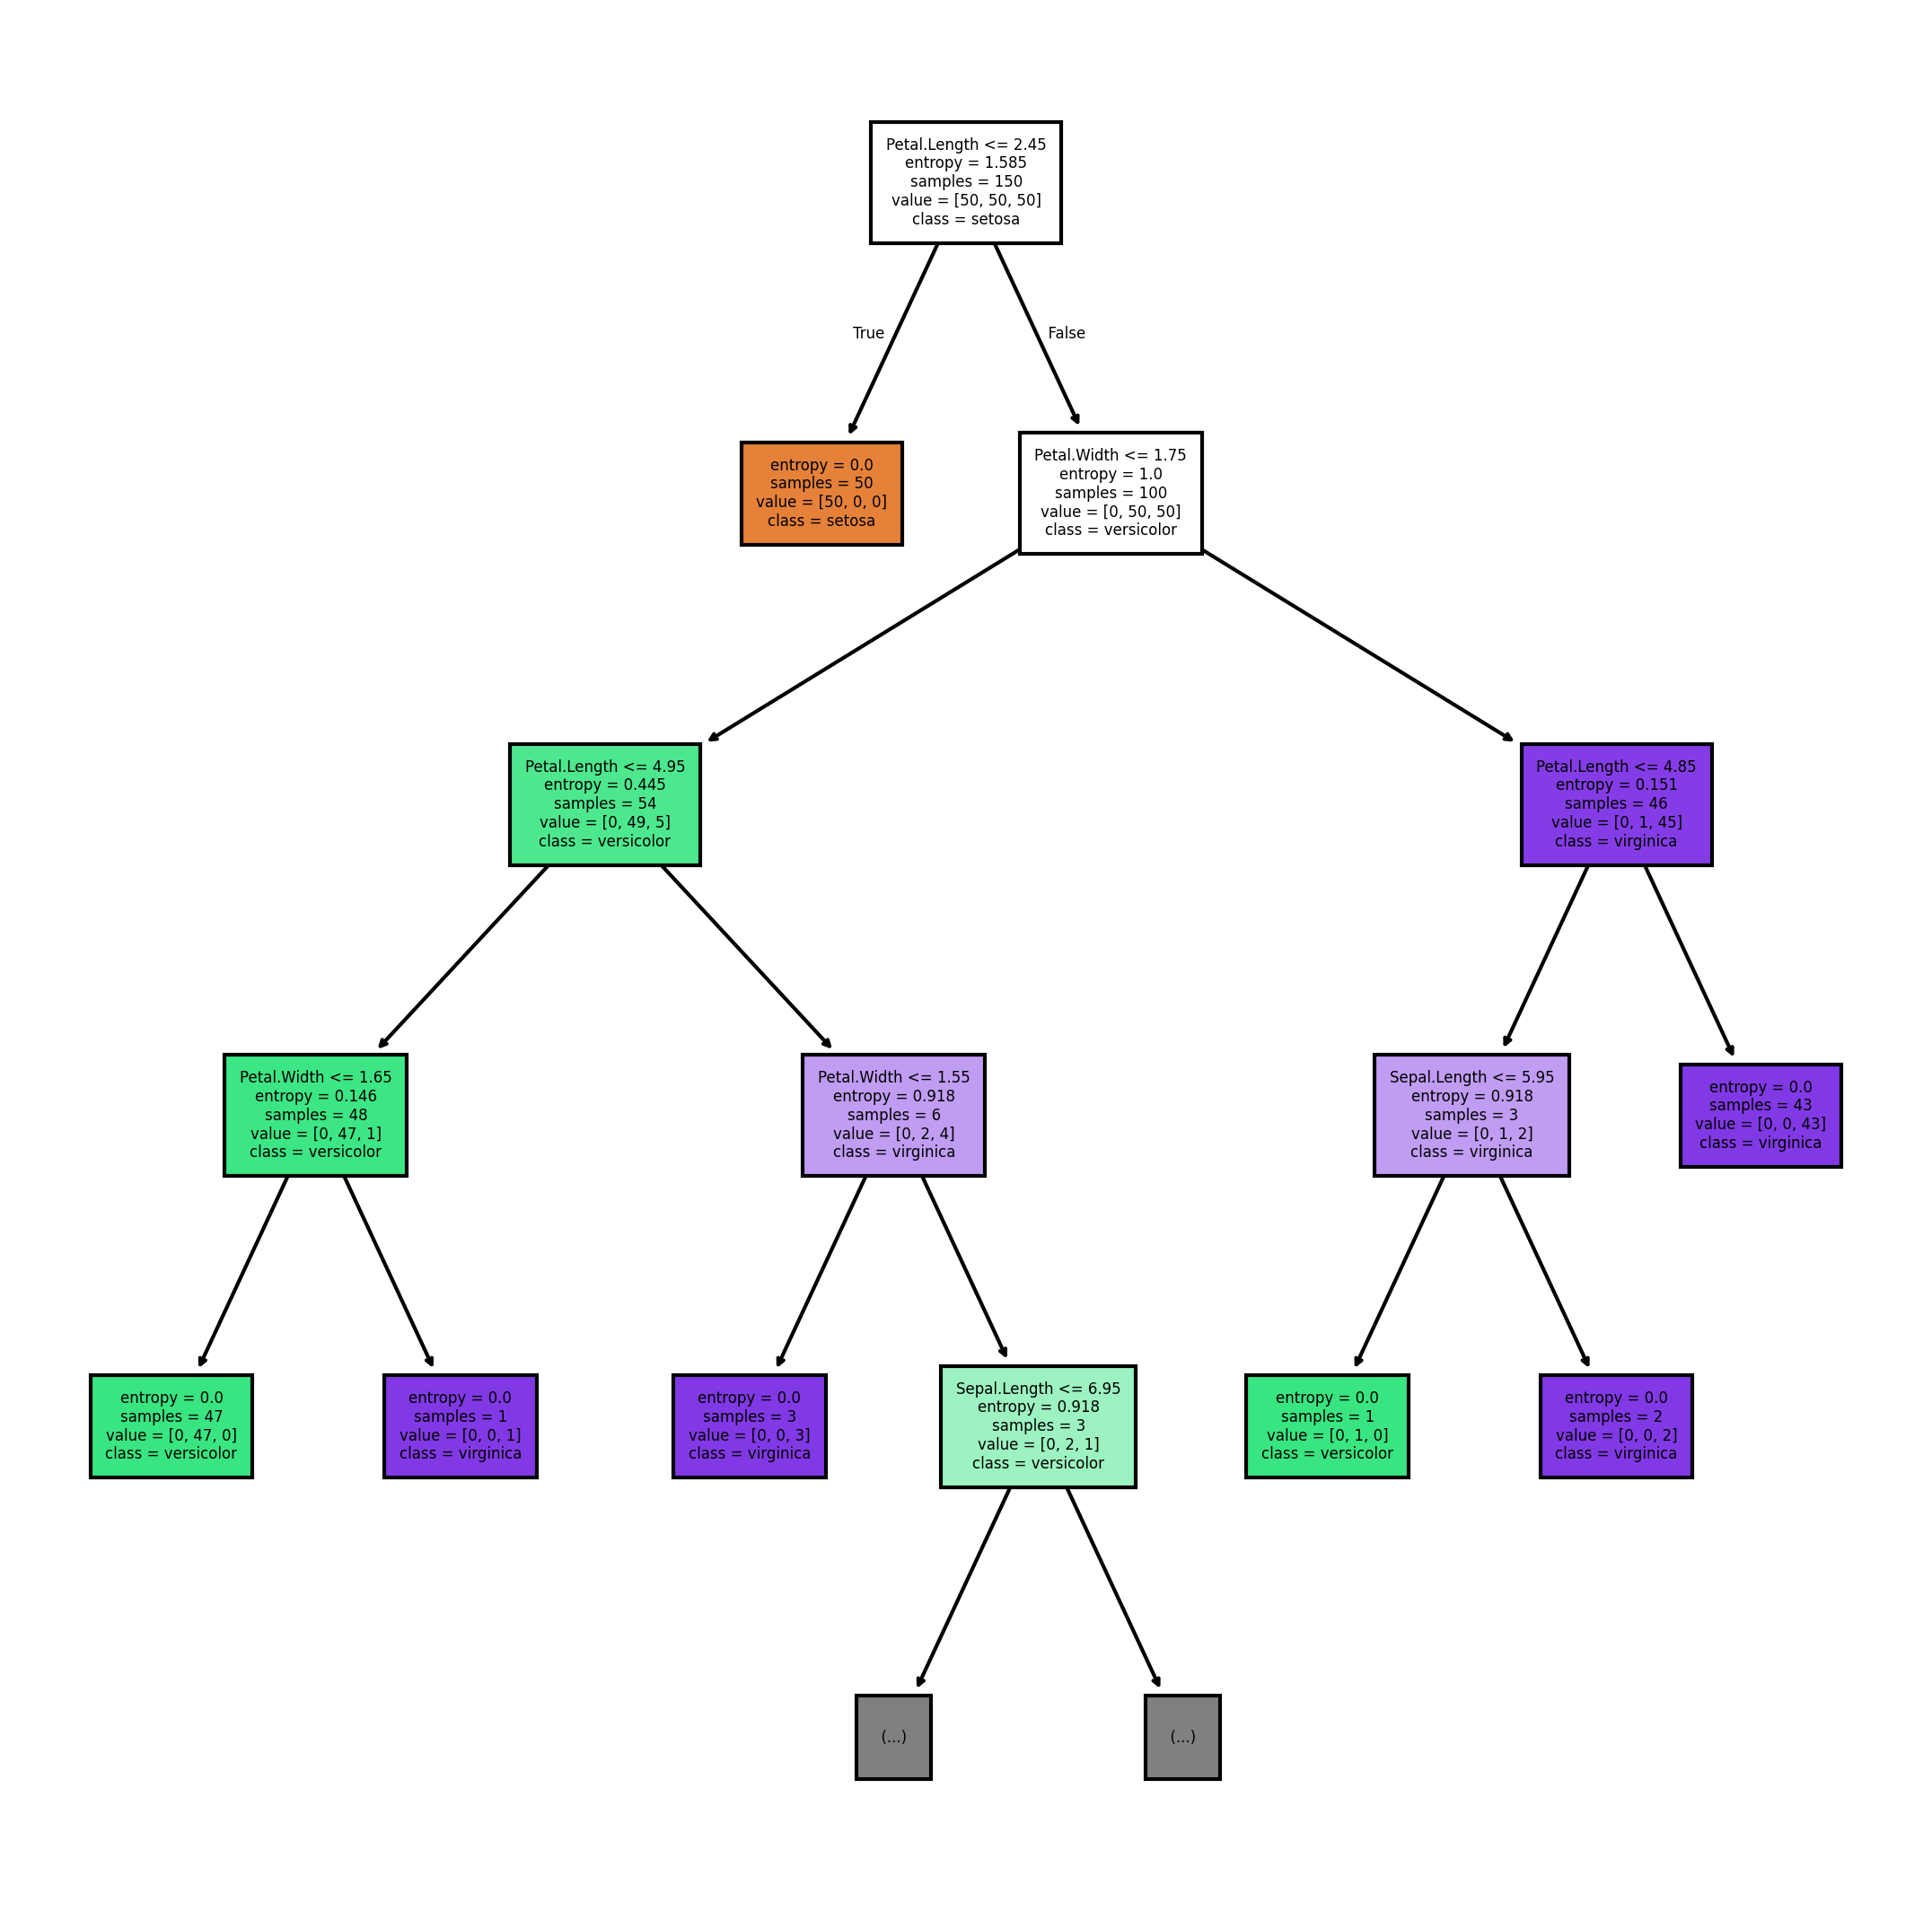

In [17]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=300)
plot_tree(iris_tree, fontsize=4, filled=True,
               max_depth=4,
               feature_names= features_df.columns,
               class_names= list(target_df['Species'].unique()))
[...]

In [18]:
predict_df = pd.DataFrame(iris_tree.predict(features_df),
                          columns=['Species'])

Let's compute the accuracy of our model.

In [19]:
print("The accuracy of our model is: {}%".format(metrics.accuracy_score(target_df, predict_df)*100))

The accuracy of our model is: 100.0%


Let's try a smaller tree, we restrict our tree model to a max depth of 2.

In [20]:
iris_tree2 = tree.DecisionTreeClassifier(criterion='entropy',
                                         max_depth=2)
iris_tree2.fit(features_df,target_df)
print(tree.export_text(iris_tree2,
                       feature_names=list(features_df)))

|--- Petal.Width <= 0.80
|   |--- class: setosa
|--- Petal.Width >  0.80
|   |--- Petal.Width <= 1.75
|   |   |--- class: versicolor
|   |--- Petal.Width >  1.75
|   |   |--- class: virginica



[Ellipsis]

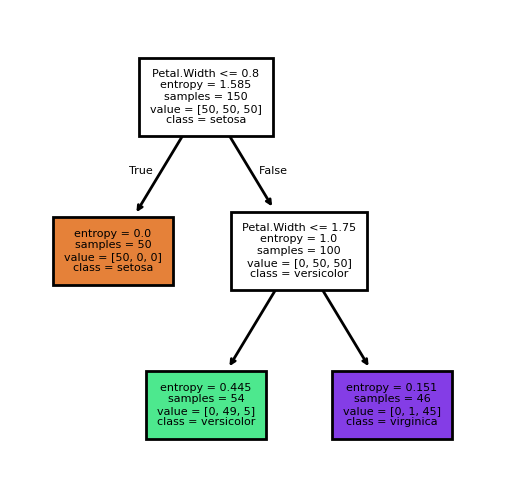

In [23]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(3,3), dpi=200)
plot_tree(iris_tree2, fontsize=4, filled=True,
               max_depth=4,
               feature_names= features_df.columns,
               class_names= list(target_df['Species'].unique()))
[...]

In [21]:
predict_df2 = pd.DataFrame(iris_tree2.predict(features_df), columns=['Species'])

In [22]:
print("The accuracy of our model is: {}%".format(metrics.accuracy_score(target_df, predict_df2)*100))

The accuracy of our model is: 96.0%


**Observation**: by restricting the complexity of the model we often obtain very readable and
understandable models without sacrificing a lot of accuracy!

# Model Parameters

The sklearn decision tree model has many *hyperparameters* that we can change.  

```
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)[source]
```
One of those parameters that we did set in our previous models was **max_depth**.
The **max_depth** parameter helps us to control **model complexity**.


# Reading

* 5.0 [Machine Learning](https://jakevdp.github.io/PythonDataScienceHandbook/05.00-machine-learning.html)
* 5.1 [What Is Machine Learning?](https://jakevdp.github.io/PythonDataScienceHandbook/05.01-what-is-machine-learning.html)
* 5.2 [Introducing Scikit-Learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html)
